In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os

import random

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:

train_dec = "D:\code\deep learning\Plant detection\data-set-cleaned"
check_data = "D:\code\deep learning\Plant detection\data-set-cleaned\\moneyPlant\\"

In [4]:
a = os.listdir(check_data)

In [5]:
img = cv2.imread(check_data + random.choice(a))
img = cv2.resize(img, (250, 250))

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

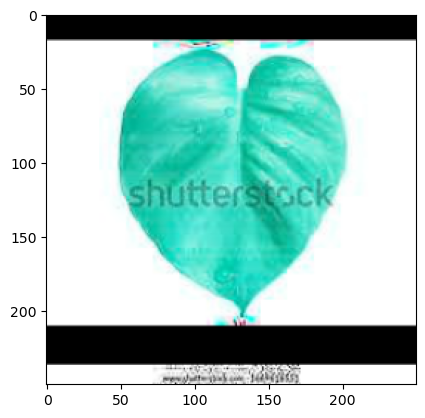

In [6]:
imgplot = plt.imshow(img)
img


In [7]:
BATCTH_SIZE = 16
IMG_SIZE = (150,150)

In [8]:
train_data = tf.keras.utils.image_dataset_from_directory(directory =train_dec,
                                                             batch_size=BATCTH_SIZE,
                                                             label_mode = 'categorical',
                                                             image_size = IMG_SIZE,
                                                            validation_split=0.2,
                                                            subset="training",
                                                             seed = 42,
                                                             shuffle=True)

test_data = tf.keras.utils.image_dataset_from_directory(directory =train_dec,
                                                             batch_size=BATCTH_SIZE,
                                                             label_mode = 'categorical',
                                                             image_size = IMG_SIZE,
                                                            validation_split=0.2,
                                                            subset="validation",
                                                             seed = 42,
                                                             shuffle=True)


Found 1247 files belonging to 3 classes.
Using 998 files for training.
Found 1247 files belonging to 3 classes.
Using 249 files for validation.


In [22]:
for images, labels in train_data.take(1):
    print(labels)

tf.Tensor(
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]], shape=(16, 3), dtype=float32)


In [10]:
IMG_SIZE_model = (150,150,3)

In [18]:
from keras.layers import Conv2D, Dense, Flatten, Dropout,MaxPooling2D
from keras.models import Sequential

my_model = Sequential()
my_model.add(tf.keras.layers.Input(shape = IMG_SIZE_model, name = "inptut_layer"))
my_model.add(tf.keras.layers.Rescaling(1./255))
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(250, activation='relu'))
my_model.add(Dense(3, activation='softmax'))

opt = tf.keras.optimizers.SGD(learning_rate=0.02)

In [19]:

my_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 64)      3136      
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        65600     
                                                                 
 dropout_3 (Dropout)         (None, 72, 72, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 69, 69, 128)       131200    
                                                                 
 conv2d_9 (Conv2D)           (None, 33, 33, 128)       262272    
                                                                 
 dropout_4 (Dropout)         (None, 33, 33, 128)      

In [20]:
initial_epochs = 100

In [21]:

history_model_1= my_model.fit(train_data,
                             epochs=initial_epochs,
                             verbose = 1,
                             validation_data = test_data)

Epoch 1/100
63/63 [==============================] - 18s 239ms/step - loss: 1.0854 - accuracy: 0.4208 - val_loss: 1.0910 - val_accuracy: 0.3896
Epoch 2/100
63/63 [==============================] - 15s 230ms/step - loss: 1.0787 - accuracy: 0.4289 - val_loss: 1.0905 - val_accuracy: 0.3896
Epoch 3/100
63/63 [==============================] - 15s 229ms/step - loss: 1.0789 - accuracy: 0.4289 - val_loss: 1.0903 - val_accuracy: 0.3896
Epoch 4/100
63/63 [==============================] - 15s 230ms/step - loss: 1.0775 - accuracy: 0.4289 - val_loss: 1.0890 - val_accuracy: 0.3896
Epoch 5/100
63/63 [==============================] - 15s 230ms/step - loss: 1.0733 - accuracy: 0.4289 - val_loss: 1.0920 - val_accuracy: 0.3896
Epoch 6/100
63/63 [==============================] - 15s 230ms/step - loss: 1.0712 - accuracy: 0.4289 - val_loss: 1.0896 - val_accuracy: 0.3896
Epoch 7/100
63/63 [==============================] - 15s 230ms/step - loss: 1.0700 - accuracy: 0.4299 - val_loss: 1.0901 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
plt.plot(history_model_1.history['loss'])

D:\code\code\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________